In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
filenames=['metro_total.csv','will.csv', 'mchenry.csv','kane.csv', 'dupage.csv', 'cook.csv']
all_areas=['metro', 'will', 'mchenry', 'kane', 'dupage', 'cook']
d={}
for x in all_areas:
    i=0
    #create dataframes for each of the areas based on the csv
    y=filenames[i]
    d["df_{0}".format(x)]=pd.read_csv(y)
    
    d["df_{0}".format(x)].name=str(x)
    d["df_{0}".format(x)].set_index('YEAR')

    
    
    i+=1

In [3]:
industries=d['df_metro'].columns.values.tolist()
industries=industries[2:]

In [4]:
formatted_names=['Metro Total', 'Will County', 'McHenry County', 'Kane County', 'DuPage County', 'Cook County']

In [5]:
names={}
for key in formatted_names:
    for value in all_areas:
        names[key]=value
        all_areas.remove(value)
        break
        

Do you want to see a graph, or an estimate of employment?
Enter "Graph" or "Estimate" 

Graph

Enter one of the areas listed below 

Metro Total
Will County
McHenry County
Kane County
DuPage County
Cook County

Metro Total

Enter one of the industries listed below 

ALL INDUSTRIES
AGRICULTURE, FORESTRY, FISHING, & HUNTING (11)
MINING, QUARRYING, & OIL AND GAS EXTRACTION (21)
UTILITIES (22)
CONSTRUCTION (23)
MANUFACTURING (31-33)
FOOD
BEVERAGE & TOBACCO
TEXTILE MILLS
TEXTILE PRODUCT MILLS
APPAREL
LEATHER & ALLIED PRODUCTS
WOOD PRODUCTS
PAPER
PRINTING & RELATED SUPPORT
PETROLEUM & COAL PRODUCTS
CHEMICAL
PLASTICS & RUBBER PRODUCTS
NONMETALLIC MINERAL PRODUCTS
PRIMARY METAL PRODUCTS
FABRICATED METAL PRODUCTS
MACHINERY
COMPUTER & ELECTRONIC PDTS.
ELECTRICAL EQUIP., APPLIANCES, & COMP.
TRANSPORTATION EQUIPMENT
FURNITURE & RELATED PRODUCTS
MISCELLANEOUS MANUFACTURING
WHOLESALE TRADE (42)
RETAIL TRADE (44-45)
TRANSPORTATION & WAREHOUSING (48-49)
INFORMATION (51)
FINANCE & INSURANCE (52)
REAL E

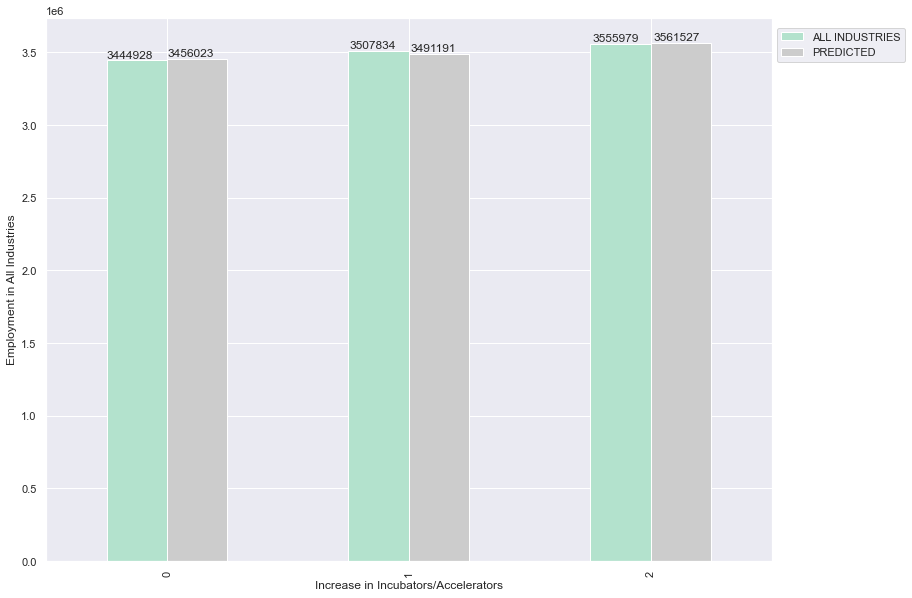


Enter "STOP" if you do not want to see more graphs/estimates. Otherwise, enter "CONTINUE"
CONTINUE

Do you want to see a graph, or an estimate of employment?
Enter "Graph" or "Estimate" 

Estimate

Enter one of the areas listed below 

Metro Total
Will County
McHenry County
Kane County
DuPage County
Cook County

Metro Total

Enter one of the industries listed below 

ALL INDUSTRIES
AGRICULTURE, FORESTRY, FISHING, & HUNTING (11)
MINING, QUARRYING, & OIL AND GAS EXTRACTION (21)
UTILITIES (22)
CONSTRUCTION (23)
MANUFACTURING (31-33)
FOOD
BEVERAGE & TOBACCO
TEXTILE MILLS
TEXTILE PRODUCT MILLS
APPAREL
LEATHER & ALLIED PRODUCTS
WOOD PRODUCTS
PAPER
PRINTING & RELATED SUPPORT
PETROLEUM & COAL PRODUCTS
CHEMICAL
PLASTICS & RUBBER PRODUCTS
NONMETALLIC MINERAL PRODUCTS
PRIMARY METAL PRODUCTS
FABRICATED METAL PRODUCTS
MACHINERY
COMPUTER & ELECTRONIC PDTS.
ELECTRICAL EQUIP., APPLIANCES, & COMP.
TRANSPORTATION EQUIPMENT
FURNITURE & RELATED PRODUCTS
MISCELLANEOUS MANUFACTURING
WHOLESALE TRADE (42)
RE

In [6]:
while x!='STOP':
    
    print('Do you want to see a graph, or an estimate of employment?\nEnter "Graph" or "Estimate" \n')
    entry=input()
    if not(entry=='Graph' or entry=='Estimate'):
        raise Exception('This entry is not valid')
        break
    
    
    
    
    print('\nEnter one of the areas listed below \n')
    for y in formatted_names:
        print(y)
    print('')
    area=input()
    if not(area in formatted_names):
        raise Exception('This area is not valid')
        break
  
    
    
    print('\nEnter one of the industries listed below \n')
    for y in industries:
        print(y)
    print('')
    industry=input()
    if not(industry in industries):
        raise Exception('This industry is not valid')
        break
    

    
    #include code for graph and representation
    
    #fit coefficients
    filename='df_'+names[area]
    df=d[filename]
    coef=np.polyfit(df['INCUBATORS'],df[industry],1)
    
    #generate predictions for the entire series
    df['PREDICTED'] = pd.Series(np.polyval(coef, df['INCUBATORS']))
    df.PREDICTED=df.PREDICTED.round(decimals=0)
    df.PREDICTED=df.PREDICTED.astype(np.int64)
    
    #display graph if requested
    if entry=='Graph':
        '''
        ax=df[[industry, 'PREDICTED']].plot()
        ax.set_xlabel('Increase in Incubators')
        z='Employment in '+ industry
        a.set_ylabel(z)
        plt.show()
        '''
        ax=df[[industry, 'PREDICTED']].plot(kind='bar',figsize=(13,10),colormap='Pastel2')
        ax.set_xlabel('Increase in Incubators/Accelerators')
        z='Employment in All Industries'
        if not industry=='ALL INDUSTRIES':
            z='Employment in the ' + industry+' Industry'
        ax.set_ylabel(z)
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.95))

        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        plt.show()
    
    #display estimate if required
    if entry=='Estimate':
        print('\nEnter the number of incubators/accelerators\n')
        num=int(input())
        print('')
        if not(isinstance(num,int)):
            raise Exception('This is not an integer')
        print(str(round(np.polyval(coef,num)))+' employees')
    print('\nEnter "STOP" if you do not want to see more graphs/estimates. Otherwise, enter "CONTINUE"')
    x=input()
    print('')

x=True           